**Багров Матвей, 3530901/00201**

# Лабораторная работа №2

## Упражнения 1 и 2

Импортируем нужные библиотеки и файлы, импортируем файл thinkdsp.py необходимый для работы

In [1]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import *

--2023-04-04 09:33:19--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2023-04-04 09:33:19--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.006s  

2023-04-04 09:33:20 (7.15 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



Создадим SawToothSignal унаследуем от класса Signal.

In [3]:
class SawToothSignal(Signal):
  def evaluate(self,ts):
    cycles = self.freq * ts + self.offset / np.pi / 2
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

cycles — число циклов со времени начала.
frаc — это последовательность, растущая в пределах от 0 до 1 с заданной частотой.
unbias смещает сигнал так, что он центрируется по 0; 
затем normalize масштабирует его до заданной амплитуды amp.

Создадим пилообразный сигнал:



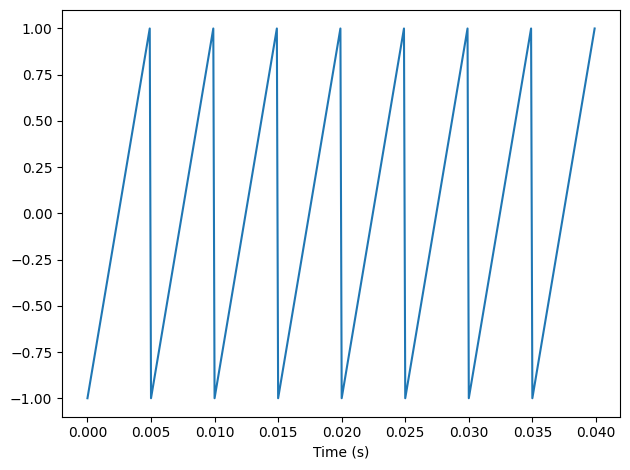

In [37]:
saw_signal = SawToothSignal(200)
saw_wave = saw_signal.make_wave(duration=0.04, framerate=10000)
saw_wave.plot()
decorate(xlabel='Time (s)')
saw_wave.make_audio()

Получим спектр этого сигнала:

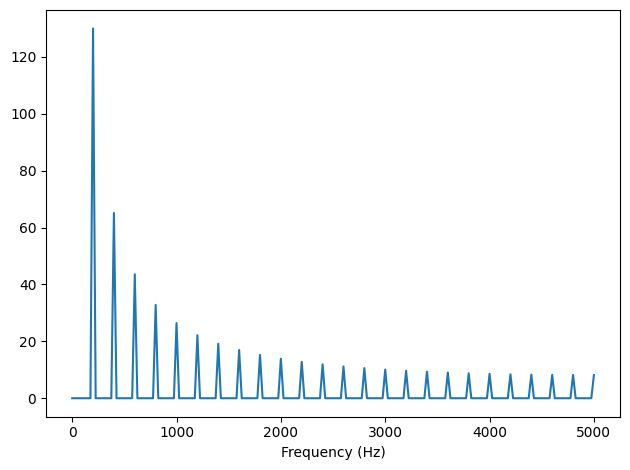

In [38]:
spectrum = saw_wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Создадим треугольный сигнал и отобразим его спектр:

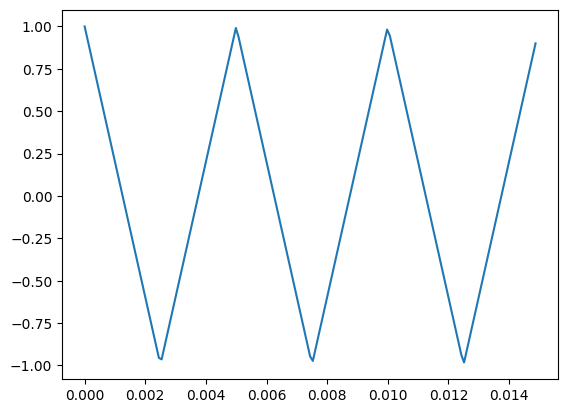

In [39]:
triangle_signal = TriangleSignal(200)
triangle_signal.plot()
triangle_signal.make_wave().make_audio()

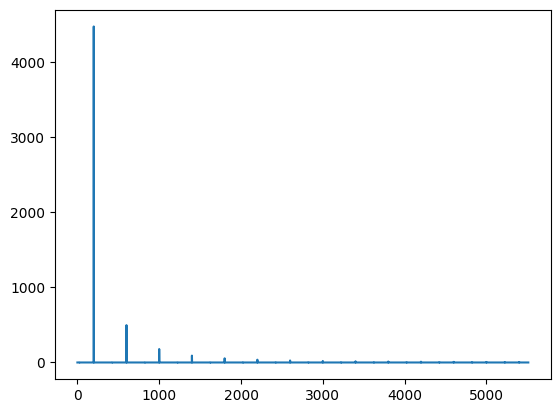

In [40]:
triangle_signal_spectrum = triangle_signal.make_wave().make_spectrum()
triangle_signal_spectrum.plot()

Создадим прямоугольный сигнал и отобразим его спектр:

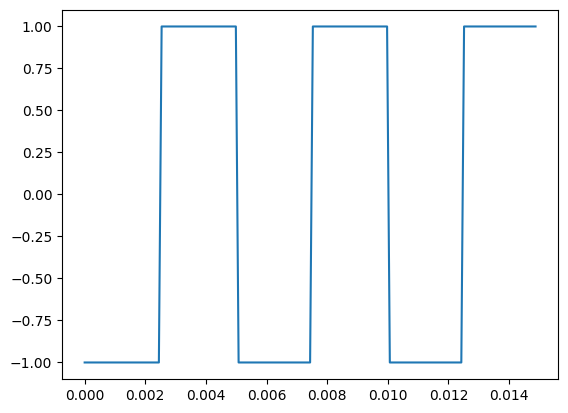

In [42]:
square_signal = SquareSignal(200)
square_signal.plot()
square_signal.make_wave().make_audio()

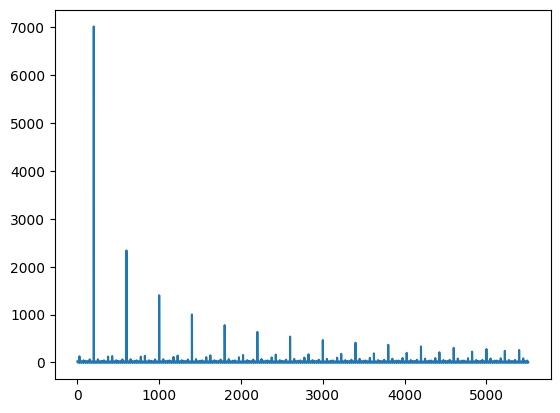

In [43]:
square_signal_spectrum = square_signal.make_wave().make_spectrum()
square_signal_spectrum.plot()

Видим, что амплитуда пилообразного сигнала снижается также как и спектр квадратного сигнала (пропорционально частоте), однако в отличие от квадратного он включает в себя и четные и нечетные гармоники.
Амплитуда треугольного сигнала убывает с отношением 1/f^2, в то время как амплитуда пилообразного сигнала с отношением 1/f


## Упражнение 3

Создадим прямоугольный сигнал 1100 Гц и вычислим wave с выборками 10 000 кадров в секунду. Построим спектр:

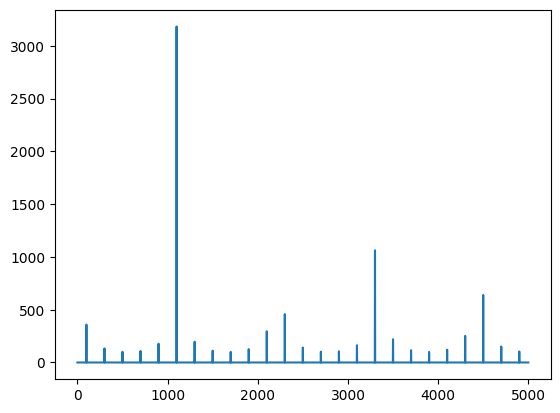

In [44]:
signal = SquareSignal(freq=1100)
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.make_spectrum().plot()

Базовая частота 1100 Гц, вторая гармоника находится на 3300 Hz, третья должна быть на 5500, но из-за завертки она на частоте 4500, четвертая должна быть на 7700, однако мы видим что из-за завертки она нахожится на частоте 2300.
Прослушаем полученную волну:

In [45]:
wave.make_audio()

Мы воспринимаем фуедаментальную частоту 1100 Hz, для сравнения, вот так звучит синусоидный сигнал с частотой 1100 Hz:

In [46]:
SinSignal(1100).make_wave(duration=0.5, framerate=10000).make_audio()

## Упражнение 4

Создадим треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд. Выведем его:

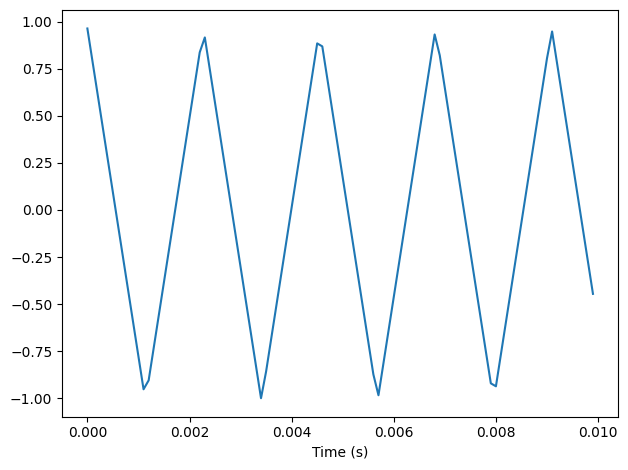

In [50]:
signal = TriangleSignal(440)
segment = signal.make_wave(duration=0.01, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Создадим объект Spectrum:

In [51]:
spectrum = segment.make_spectrum()
spectrum.hs[0]

(3.375077994860476e-14+0j)

Амплитуда этого компонента близка к 0. Фаза этого компонента = 0.

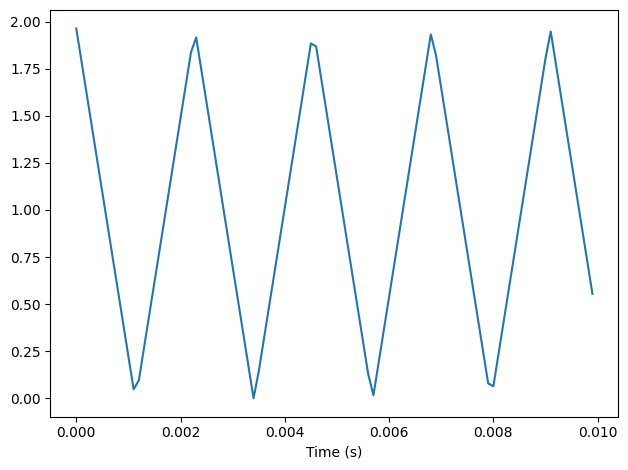

In [52]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

Можно заметить, что после того как мы зменили первый элемент спектра, весь спектр сместился вверх. Следовательно, от первого элемента зависит смещение. Если этот элемент близок или равен нулю, то сигнал не будет смещён относительно вертикальной оси.

## Упражнение 5 

Напишем функцию, которая принимает на вход Spectrum как параметр и изменяет его делением каждого элемента hs на соответствующую частоту из fs.

In [55]:
def divide_spectrum(spectrum):
  spectrum.hs /= spectrum.fs
  spectrum.hs[0] = 0
  spectrum.plot()
  decorate(xlabel='Frequency (Hz)')

Проверим работу этой функции на пилообразном сигнале:

<ipython-input-55-10593fde8b93>:2: RuntimeWarning: divide by zero encountered in true_divide
  spectrum.hs /= spectrum.fs
<ipython-input-55-10593fde8b93>:2: RuntimeWarning: invalid value encountered in true_divide
  spectrum.hs /= spectrum.fs


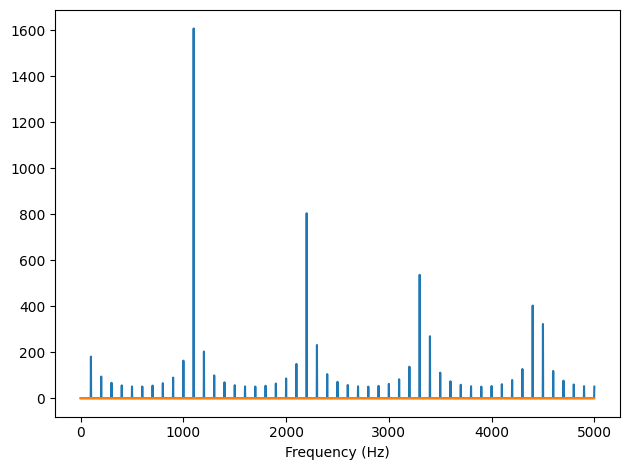

In [56]:
signal = SawToothSignal(freq=1100)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')
wave.make_audio()

<ipython-input-55-10593fde8b93>:2: RuntimeWarning: invalid value encountered in true_divide
  spectrum.hs /= spectrum.fs


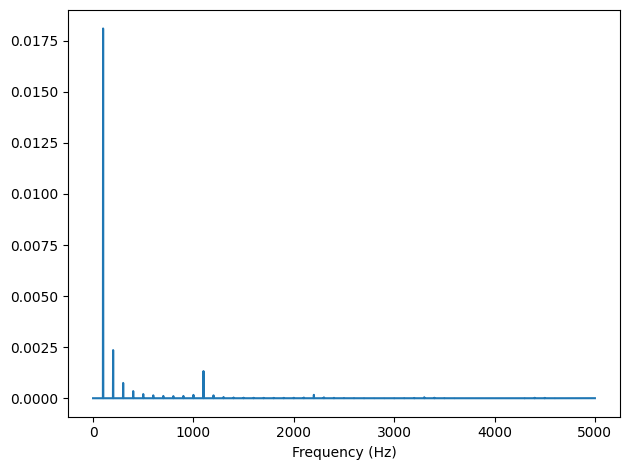

In [57]:
divide_spectrum(spectrum)
spectrum.make_wave().make_audio()

Проанализировав графики и звук, видим, что что функция действует как фильтр низких частот: высокие частоты ощутимо ослабляются в отличии от низких. Т.е. ее работа аналогично low_pass().

## Упражнение 6 

У треугольных и прямоугольных сигналов есть только нечентые гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально 1/f; гармоники треугольных сигналов - пропорционально 1/f^2. Попробуем найти сигнал, состоящий из четных и нечетных гармоник, спадающих пропорционально 1/f^2.
Чтобы решить задачу, возьмем пилообразный сигнал и поделим каждую амплитуду на герцовку, опираясь на предыдущее упражнение.

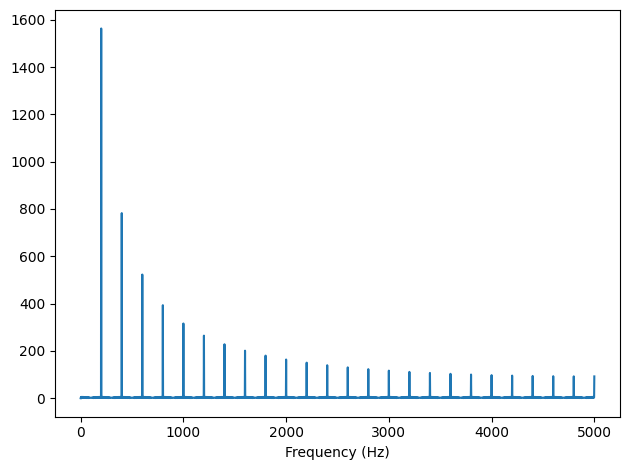

In [61]:
signal = SawToothSignal(freq=200)
wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

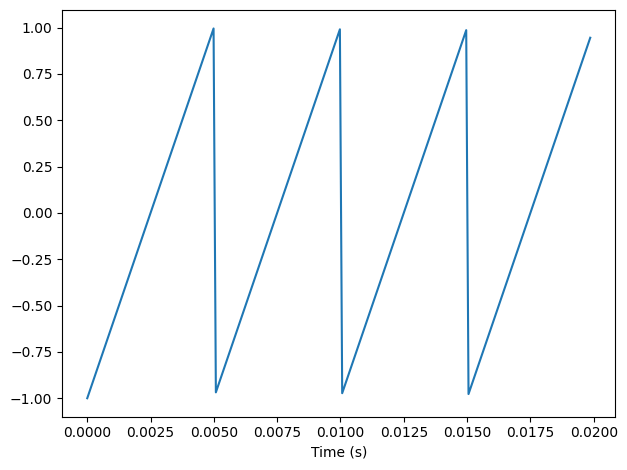

In [63]:
segment = signal.make_wave(duration=0.02)
segment.plot()
decorate(xlabel='Time (s)')

<ipython-input-55-10593fde8b93>:2: RuntimeWarning: divide by zero encountered in true_divide
  spectrum.hs /= spectrum.fs
<ipython-input-55-10593fde8b93>:2: RuntimeWarning: invalid value encountered in true_divide
  spectrum.hs /= spectrum.fs


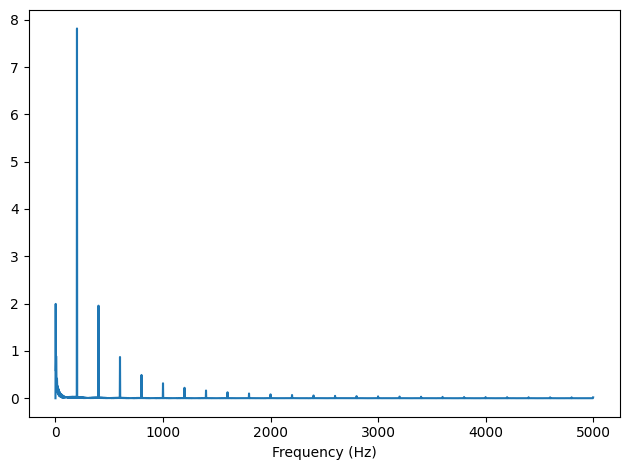

In [64]:
divide_spectrum(spectrum)

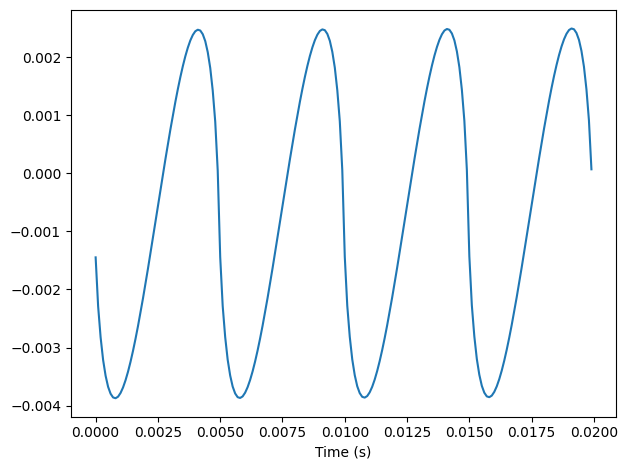

In [66]:
spectrum.make_wave().segment(duration=0.02).plot()
decorate(xlabel='Time (s)')

Сигнал приобрел синусоидальную форму